In [1]:
import cv2
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Versão da OpenCV:  3.4.0



## Imagem original

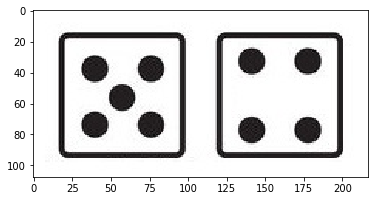

In [17]:
imagem = cv2.imread('dados5.jpg')
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
#img=img[:,:,0] # pega apenas o primeiro canal da imagem
imshow(img)
#imshow(np.asarray(imagem[:, :, ::-1])) # altera a ultima dimensão para trocar azul por vermelho -> BRG to RGB

## Filtros

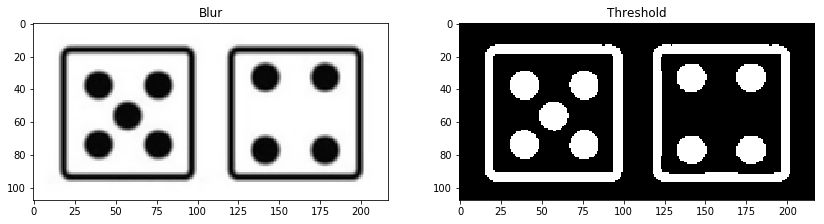

In [18]:
#img = img[::2,::2] # reduz imagem pela metade
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
blur = cv2.blur(gray, (3, 3)) # aplica blur
bin = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 5)

plt.figure(figsize=(14, 9)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Blur')
plt.imshow(blur, cmap='gray')

plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Threshold')
plt.imshow(bin, cmap='gray')


## Identificando objetos pelos contornos

Quantidade de objetos: 13


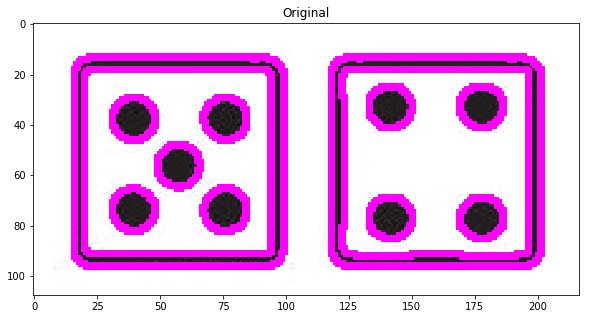

In [19]:
#Passo 5: Identificação e contagem dos contornos da imagem
#cv2.RETR_EXTERNAL = conta apenas os contornos externos
(lx, objetos, tree) = cv2.findContours(bin.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados
print("Quantidade de objetos: "+str(len(objetos)))
imgC2 = img.copy()
cv2.drawContours(imgC2, objetos, -1, (255, 0, 255), 2)
plt.figure(figsize=(14, 5)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((1,1),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Original')
plt.imshow(imgC2)